In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import pie_chart, likert
from ipynb.fs.full.bootstrapping_utils import single_option_sampling, bootstrapping, confidence_interval
from statistics import mean, pstdev

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# remove undesired and not useful data
remove_value(df,'-77','Q6_ML_Solution_Optimality')
remove_value(df,'I don\'t know','Q6_ML_Solution_Optimality')

In [4]:
valid_options_list = list(df['Q6_ML_Solution_Optimality'].unique())

In [5]:
valid_answers_list = list(df['Q6_ML_Solution_Optimality'])

In [6]:
bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000)

In [7]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['Never'])
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 14.8418| Lower: 14.809092771198097| Uper: 14.874507228801901


In [8]:
normalized_bootstrapped_dict_data = {}
for option in bootstrapped_dict_data:
    normalized_value = sum(bootstrapped_dict_data[option]) / 1000
    normalized_bootstrapped_dict_data[option] = normalized_value

In [9]:
normalized_bootstrapped_dict_data

{'Frequently': 40.1508,
 'Never': 14.841800000000012,
 'Sometimes': 32.80869999999998,
 'Rarely': 7.4289999999999985,
 'Always': 4.7696999999999985}

In [21]:
labels = list(normalized_bootstrapped_dict_data.keys())
values = list(normalized_bootstrapped_dict_data.values())

In [22]:
# logical order to likert plot
order = [4, 0, 2, 3, 1]
labels = [labels[i] for i in order]
values = [values[i] for i in order]

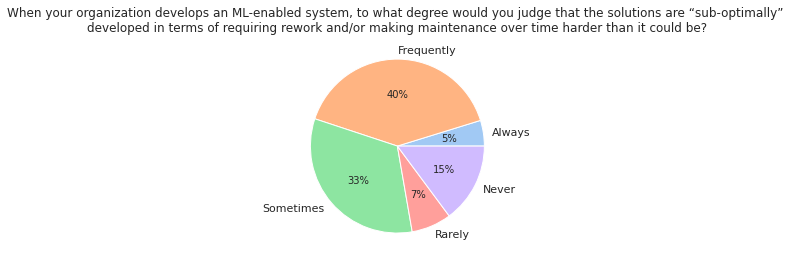

In [23]:
pie_chart(values, labels, 
          title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally” \ndeveloped in terms of requiring rework and/or making maintenance over time harder than it could be?")

In [24]:
# likert plot expect dataframe
d11_df = pd.DataFrame()
population_agile_development = []
for label, value in zip(labels, values):
    population_agile_development += [label for _ in range(round( (value * 1000) / 100 ))]
d11_df['Sub Optimal'] = population_agile_development

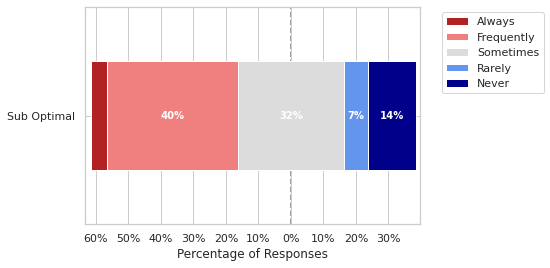

In [25]:
likert(d11_df, labels, use_percentage=True, bar_label=True)

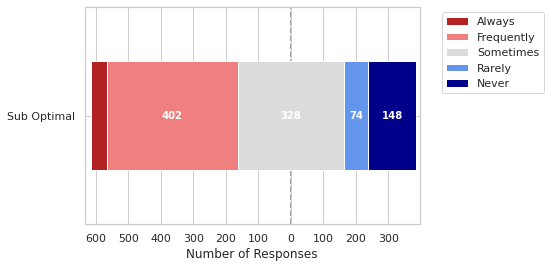

In [26]:
likert(d11_df, labels, use_percentage=False, bar_label=True)